<a href="https://colab.research.google.com/github/ColeTKrause/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation

### References
**Chapter 20: Python Numerical Methods** \
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.01-Numerical-Differentiation-Problem-Statement.html

## Problem Statement
### Section 20.1

**Numerical Differentiation** is the process of determining a numerical value of a function's derivative for at a specified point and serves as a tool for programmers that need to approximate the derivative of $f$. For a standard single input, single output function $f(x)$ a numerical grid is used to determine a set of evenly spaced points over some desired interval. It is important to note here creating a **numerical grid** with evenly spaced points will result in **discretizing** the function representation. \
\
**Numerical Grid mathematically:** for a given point $j$ in a numerical grid $x_{j-1},...,x_{j-n}$ are points to the left of $x_j$ and $x_{j+1},..,x_{j+n}$ are points to the right of $x_j$ with equal step sizes of $h$\
\
**Why use numerical differentiation when an analytic solution can be found for any derivative?** \
While mathematicians can determine the analytic solution for any differentiable function, this is not efficient or even possible sometimes in computation. Furthermore, if determining the derivative incurs heavy computational cost, it may not be applicable to the problem at hand. For instance autonomous vehicles and computer vision engineers write programs to calculate velocity and acceleration from changes in position. For the autonomous vehicle to opperate safely, they need to be able to analyze data and make decisions quickly to avoid dangerous situations like an obstacle blocking the road. If calculating the velocity takes multiple seconds, even if exact, the autonomous vehicle will not be able to respond to the danger in time.

## Finite Difference Approximating Derivatives
### Section 20.1

Recall: To determine th derivative of a function $f(x)$ at a given point $x=a$, the definition of a derivative is: \
$f'(a)=lim_{x → a}\frac{f(x)-f(a)}{x-a}$ \
However, this formula determines the exact or analytical solution and this could cost inifinite iterations as $x$ approaches $a$. \
\
**Finite Difference** is an approach to provide an approximation by using values in the neighborhood of $x=a$. **Forward difference** is the approach by using values in the neighborhood to the right of $x_j$. **Backward difference** is an approach by using values in the neighborhood to the left of $x_j$. **Central difference** provides an esimate by using points to the left and the right of $x_j$\
\
**Forward difference:** $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$ \
\
**Backward difference:** $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_j - x_{j-1}}$ \
\
**Central difference:** $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1} - x_{j-1}}$ \
\
**Taylor Series Approximations:** Is another approach to determine a Finite Difference Approximation. For the sake of brevity, observe below:

\
**Taylor series:** $f(x)=\frac{f(x_j)(x-x_j)^0}{0!}+\frac{f'(x_j)(x-x_j)^1}{1!}+\frac{f''(x_j)(x-x_j)^2}{2!}+\frac{f'''(x_j)(x-x_j)^3}{3!}+...$ \
\
let $h=x_{j+1}-x_j$ and $0(h)=h(α+ϵ(h))=- \frac{f''(x_j)(x-x_j)^2}{2!}-\frac{f'''(x_j)(x-x_j)^3}{3!}$ with $O(h^p)=h^p(\alpha + \epsilon (h))$. The resulting difference formulas become: \
**Forward difference (T):** $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{h}$, $O(h)$ \
\
**Backward difference (T):** $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{h}$, $O(h)$ \
\
**Central difference (T):** $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{2h}$, $O(h^2)$ \
\
Anlyzing the term reveals $O(h)$ describes the **accuracy** and $O(h^p)$ reveals the **order**. As it follows that as $h$ approaches zero the accuracy improves and as order increases the speed of which the approximation approaches the true value increases. The central difference reveals accuracy increases for symmetric points arround $x_j$ compared to asymetric approaches like forward difference and backward difference. \

The accuracy of approximations can be increase simply by taking more points in the neighborhood of $x_j$ such as $x_{j-2}, x_{j-1}, x_{j+1}, x_{j+2}$ resulting in: \
\
$f'(x_j)=\frac{f(x_{j-2})-8f(x_{j-1})+8f(x_{j+1})-f(x_{j+2})}{12h}+O(h^4)$ \
\
The increase in accuracy will come at a cost of increased computation. \
\
**Python Examples:** \
**Forward Difference:** \
$f(x)=sin(x)-4$ \
$f'(x)=cos(x)$




In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

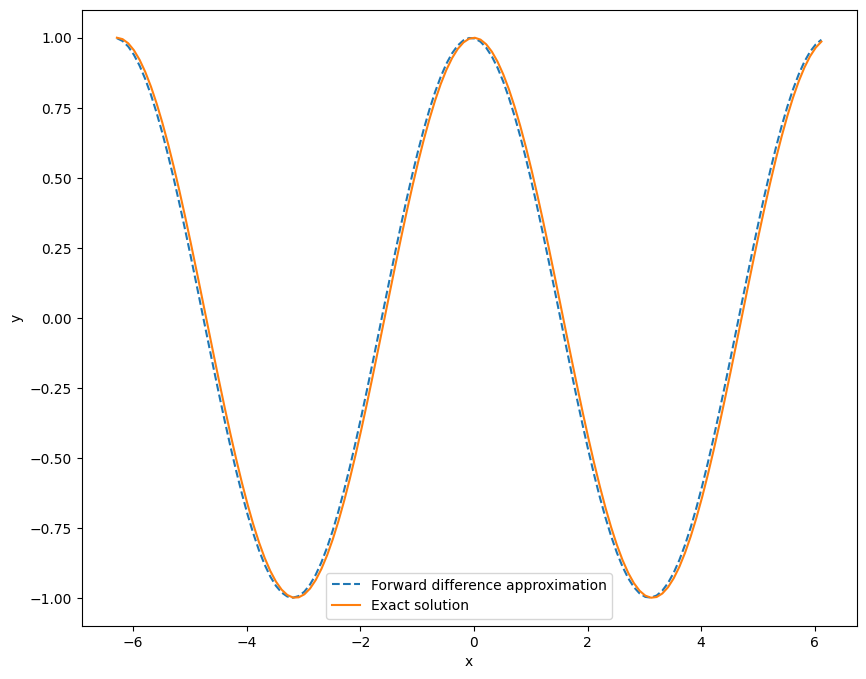

In [16]:
# Problem 1

# step size
# Try it yourself! change step size to see how it affects the accuracy
# of the approximation
h = 0.1

# linspace to create grid
x = np.arange(-2*np.pi, 2*np.pi, h)
# format x
x_diff = x[:-1:]

# compute f(x) function
y = np.sin(x) - 4

# forward difference vector
forward_diff = np.diff(y) / h

# exact solution
exact_solution = np.cos(x_diff)

# plotting
plt.figure(figsize=(10,8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Forward difference approximation')
plt.plot(x_diff, exact_solution,\
         label = 'Exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


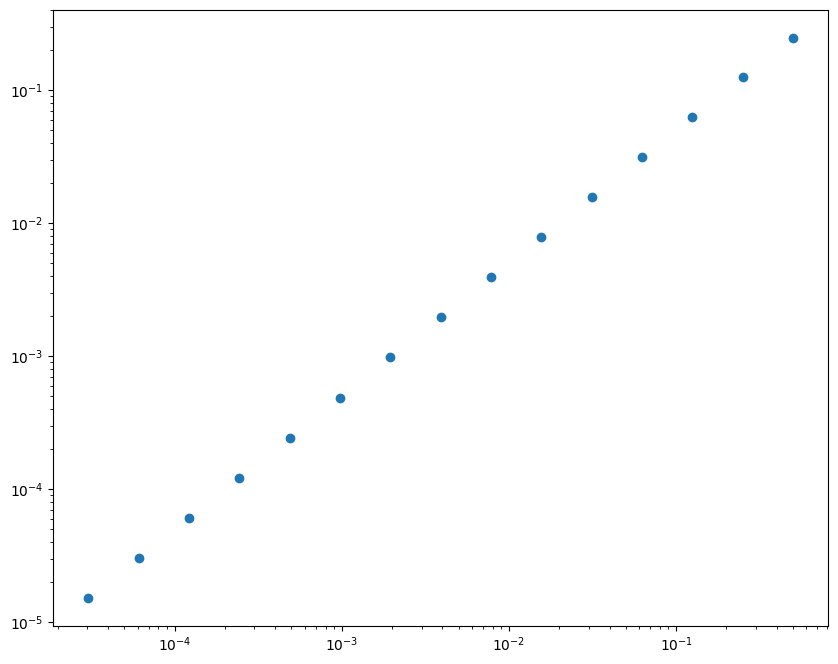

In [31]:
plt.clf

# Observing error as step size decreases
iterations = 15

# for plotting
step_size = []
max_error = []
h = 1
for i in range(iterations):
  # decreasing step size, feel free to adjust
  h = h / 2
  # storing data
  step_size.append(h)
  # recalculate numerical grid
  x = np.arange(-2*np.pi, 2*np.pi, h)
  # compute actual
  y = np.sin(x)-4
  # forward difference
  forward_diff = np.diff(y) / h
  # comput on grid
  x_diff = x[:-1:]
  # find true value
  y_true = np.cos(x_diff)


  # finally error calculations
  max_error.append(max(abs(y_true - forward_diff)))

# log error results graph
plt.figure(figsize = (10,8))
plt.loglog(step_size, max_error,'o')
plt.show()

## Approximating Higher Order Derivatives
### Section 20.3

Similar to approximating first order derivatives, a **Taylor Series** is used to determine a formula for the approximation terms and accuracy and order. Observe an approximation for a second order term by using a taylor series expansion on $a=x_j$ and computing at $x_{j-1}$ and $x_{j+1}$: \
\
$f(x_{j-1})+f(x_{j+1}) = 2f(x_j)+h^2f''(x_j))+...$ with $O(h^2)$ trailing terms \
\
$f''(x_j)=\frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2}$

In [30]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
h = 0.1
x = np.arange(-10,10,h)
x_diff = x[:-1:]

def secondOrderApprox():


## Numerical Differentiation with Noise
### Section 20.4

As stated in section 20.1, real world data is often very messy due to the physical limitations often times related to measurement. This small difference in theoretical values versus measured values is often reffered to as noise (or error). Engineers and scientist must take into account these small differences when building models and applications. One of the most common occurences of noise appears in Electrical Engineering with signal processing. In order for the models to perform better, a term can be added to $f$ to account for such occurances. In mathematical and engineering applications with noise, let $ϵ$ account for very small values and $ω$ account for large to very large values.Observe below: \
\
**Original function:** $f(x)= sin(x) - 4$ from the previously state example \
**Function with Noise:** $f_{ϵ, ω}(x)= sin(x) - 4 +ϵcos(ωx)$ \
\
Now taking the derivatives of each yeilds: \
\
$f'(x)=cos(x)$ \
$f_{ϵ,ω}'(x)=cos(x)-ϵωsin(ωx)$ \
\
The approximation in Python is as below:

In [ ]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

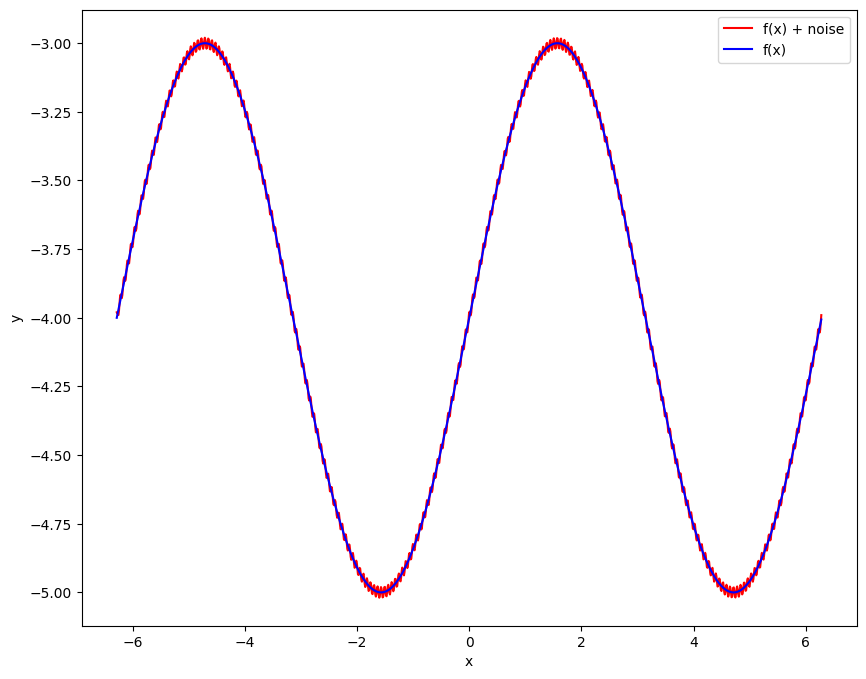

In [23]:
# Original Functions

# Step size
h = 0.01

# noise terms
epsilon = 0.02
omega = 100

# x value range
x = np.arange(-2*np.pi, 2*np.pi, h)

# original functions
y = np.sin(x) - 4
y_noise = np.sin(x) - 4 + epsilon*np.cos(omega*x)

plt.clf

# plot original functions
plt.figure(figsize=(10,8))
plt.plot(x,y_noise, 'r-', \
         label = 'f(x) + noise')
plt.plot(x,y, 'b-', \
         label = 'f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

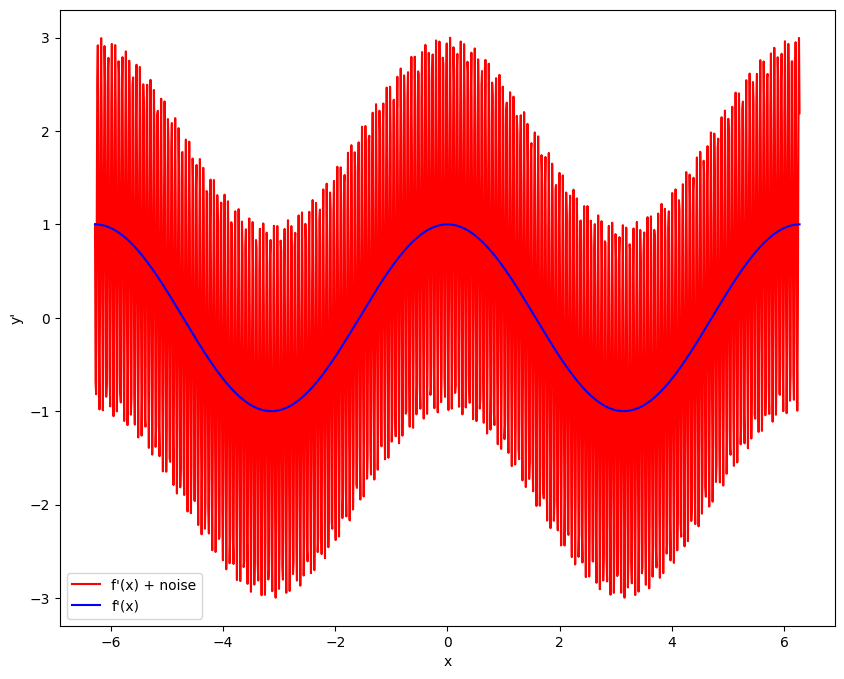

In [29]:
# Derivatives

# Step size
h = 0.01

# noise terms
epsilon = 0.02
omega = 100

# x value range
x = np.arange(-2*np.pi, 2*np.pi, h)

# original functions
y_prime = np.cos(x)
y_prime_noise = np.cos(x) - epsilon*omega*np.sin(omega*x)

plt.clf

# plot original functions
plt.figure(figsize=(10,8))
plt.plot(x,y_prime_noise, 'r-', \
         label = 'f\'(x) + noise')
plt.plot(x,y_prime, 'b-', \
         label = 'f\'(x)')
plt.xlabel('x')
plt.ylabel('y\'')
plt.legend()
plt.show()